In [27]:
from osgeo import gdal
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pygeotools.lib import iolib, warplib, geolib, timelib, malib
import holoviews as hv
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
from holoviews import Raster
import xarray as xr
import numpy as np, datashader as ds, xarray as xr
from datashader import transfer_functions as tf, reductions as rd

## For each year, merge all available files into a single tif

In [179]:
!ls -a rainier_lidar_datasets_dispersed/

.                               merged
..                              pierce_2011
.DS_Store                       rainier_2007
07_joined_dem_align             rainier_2007_merged.tif
README.txt                      rainier_2007_merged.tif.aux.xml
lewis_2009                      rainier_2012
lewis_2009_joined.tif           rainier_west_2002
lewis_2009_joined.tif.aux.xml


In [176]:
!ls -a rainier_lidar_datasets_dispersed/rainier_west_2002/dtm/
!echo
!ls -a rainier_lidar_datasets_dispersed/rainier_2007/dtm/
!echo
!ls -a rainier_lidar_datasets_dispersed/lewis_2009/dtm/
!echo
!ls -a rainier_lidar_datasets_dispersed/pierce_2011/dtm/
!echo
!ls -a rainier_lidar_datasets_dispersed/rainier_2012/dtm/

.                           rainier_west_2002_dtm_4.tif
..                          rainier_west_2002_dtm_6.tif
rainier_west_2002_dtm_3.tif rainier_west_2002_dtm_7.tif

.                       rainier_2007_dtm_13.tif rainier_2007_dtm_8.tif
..                      rainier_2007_dtm_14.tif rainier_2007_dtm_9.tif
rainier_2007_dtm_12.tif rainier_2007_dtm_7.tif

.                     lewis_2009_dtm_44.tif
..                    lewis_2009_dtm_45.tif

.                      pierce_2011_dtm_20.tif
..                     pierce_2011_dtm_7.tif

.                      rainier_2012_dtm_3.tif rainier_2012_dtm_5.tif
..                     rainier_2012_dtm_4.tif


In [180]:
!gdal_merge.py \
    -v rainier_lidar_datasets_dispersed/rainier_west_2002/dtm/*.tif \
    -o rainier_lidar_datasets_dispersed/merged/dtm_2002.tif 


Processing file     1 of     4,  0.000% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/rainier_west_2002/dtm/rainier_west_2002_dtm_3.tif
File Size: 461x7611x1
Pixel Size: 6.000000 x -6.000000
UL:(1295444.000000,565156.000000)   LR:(1298210.000000,519490.000000)
Copy 0,0,461,7611 to 5222,7691,461,7611.

Processing file     2 of     4, 25.000% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/rainier_west_2002/dtm/rainier_west_2002_dtm_4.tif
File Size: 5360x7698x1
Pixel Size: 6.000000 x -6.000000
UL:(1264112.000000,565726.000000)   LR:(1296272.000000,519538.000000)
Copy 0,0,5360,7698 to 0,7596,5360,7698.

Processing file     3 of     4, 50.000% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/rainier_west_2002/dtm/rainier_west_2002_dtm_6.tif
File Size: 329x7608x1
Pixel Size: 6.000000 x -6.000000
UL:(1296236.000000,610732.000000)   LR:(1298210.000000,565084.000000)
Copy 0,0,329,7608 to 5354,95,329,7608.

Processing file     4 of     

In [181]:
!gdal_merge.py \
    -v rainier_lidar_datasets_dispersed/rainier_2007/dtm/*.tif \
    -o rainier_lidar_datasets_dispersed/merged/dtm_2007.tif


Processing file     1 of     6,  0.000% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/rainier_2007/dtm/rainier_2007_dtm_12.tif
File Size: 10647x15361x1
Pixel Size: 3.000000 x -3.000000
UL:(1327499.000000,610213.000000)   LR:(1359440.000000,564130.000000)
Copy 0,0,10647,15361 to 15705,273,10647,15361.

Processing file     2 of     6, 16.667% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/rainier_2007/dtm/rainier_2007_dtm_13.tif
File Size: 10671x15378x1
Pixel Size: 3.000000 x -3.000000
UL:(1296239.000000,610732.000000)   LR:(1328252.000000,564598.000000)
Copy 0,0,10671,15378 to 5285,100,10671,15378.

Processing file     3 of     6, 33.333% completed in 1 minutes.
Filename: rainier_lidar_datasets_dispersed/rainier_2007/dtm/rainier_2007_dtm_14.tif
File Size: 5561x15304x1
Pixel Size: 3.000000 x -3.000000
UL:(1280384.000000,611032.000000)   LR:(1297067.000000,565120.000000)
Copy 0,0,5561,15304 to 0,0,5561,15304.

Processing file     4 of     6, 50.00

In [182]:
!gdal_merge.py \
    -v rainier_lidar_datasets_dispersed/lewis_2009/dtm/*.tif \
    -o rainier_lidar_datasets_dispersed/merged/dtm_2009.tif


Processing file     1 of     2,  0.000% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/lewis_2009/dtm/lewis_2009_dtm_44.tif
File Size: 10580x8812x1
Pixel Size: 3.000000 x -3.000000
UL:(1326776.000000,544984.000000)   LR:(1358516.000000,518548.000000)
Copy 0,0,10580,8812 to 10443,0,10580,8812.

Processing file     2 of     2, 50.000% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/lewis_2009/dtm/lewis_2009_dtm_45.tif
File Size: 10591x8655x1
Pixel Size: 3.000000 x -3.000000
UL:(1295447.000000,544984.000000)   LR:(1327220.000000,519019.000000)
Copy 0,0,10591,8655 to 0,0,10591,8655.


In [183]:
!gdal_merge.py \
    -v rainier_lidar_datasets_dispersed/pierce_2011/dtm/*.tif \
    -o rainier_lidar_datasets_dispersed/merged/dtm_2011.tif


Processing file     1 of     2,  0.000% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/pierce_2011/dtm/pierce_2011_dtm_20.tif
File Size: 10695x15394x1
Pixel Size: 3.000000 x -3.000000
UL:(1264982.000000,611302.000000)   LR:(1297067.000000,565120.000000)
Copy 0,0,10695,15394 to 264,0,10695,15394.

Processing file     2 of     2, 50.000% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/pierce_2011/dtm/pierce_2011_dtm_7.tif
File Size: 10694x13908x1
Pixel Size: 3.000000 x -3.000000
UL:(1264190.000000,565723.000000)   LR:(1296272.000000,523999.000000)
Copy 0,0,10694,13908 to 0,15193,10694,13908.


In [184]:
!gdal_merge.py \
    -v rainier_lidar_datasets_dispersed/rainier_2012/dtm/*.tif \
    -o rainier_lidar_datasets_dispersed/merged/dtm_2012.tif


Processing file     1 of     3,  0.000% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/rainier_2012/dtm/rainier_2012_dtm_3.tif
File Size: 784x12412x1
Pixel Size: 3.000000 x -3.000000
UL:(1326776.000000,556216.000000)   LR:(1329128.000000,518980.000000)
Copy 0,0,784,12412 to 15855,0,784,12412.

Processing file     2 of     3, 33.333% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/rainier_2012/dtm/rainier_2012_dtm_4.tif
File Size: 10650x12399x1
Pixel Size: 3.000000 x -3.000000
UL:(1295447.000000,556216.000000)   LR:(1327397.000000,519019.000000)
Copy 0,0,10650,12399 to 5412,0,10650,12399.

Processing file     3 of     3, 66.667% completed in 0 minutes.
Filename: rainier_lidar_datasets_dispersed/rainier_2012/dtm/rainier_2012_dtm_5.tif
File Size: 5635x12225x1
Pixel Size: 3.000000 x -3.000000
UL:(1279211.000000,556216.000000)   LR:(1296116.000000,519541.000000)
Copy 0,0,5635,12225 to 0,0,5635,12225.


In [96]:
!gdal_merge.py \
    -v wa_state_lidar_datasets/*.dem \
    -o wa_state_lidar_datasets/merged/dtm.tif


Processing file     1 of    15,  0.000% completed in 0 minutes.
Filename: wa_state_lidar_datasets/q1725.dem
File Size: 971x1403x1
Pixel Size: 10.000000 x -10.000000
UL:(576025.000000,5205565.000000)   LR:(585735.000000,5191535.000000)
Copy 0,0,971,1403 to 0,67,971,1403.

Processing file     2 of    15,  6.667% completed in 0 minutes.
Filename: wa_state_lidar_datasets/q1726.dem
File Size: 972x1406x1
Pixel Size: 10.000000 x -10.000000
UL:(585535.000000,5205715.000000)   LR:(595255.000000,5191655.000000)
Copy 0,0,972,1406 to 951,52,972,1406.

Processing file     3 of    15, 13.333% completed in 0 minutes.
Filename: wa_state_lidar_datasets/q1727.dem
File Size: 975x1407x1
Pixel Size: 10.000000 x -10.000000
UL:(595035.000000,5205875.000000)   LR:(604785.000000,5191805.000000)
Copy 0,0,975,1407 to 1901,36,975,1407.

Processing file     4 of    15, 20.000% completed in 0 minutes.
Filename: wa_state_lidar_datasets/q1728.dem
File Size: 977x1408x1
Pixel Size: 10.000000 x -10.000000
UL:(604535.00

In [ ]:
!gdal_merge.py \
    -v rainier_lidar_datasets_dispersed/rainier_2012/dtm/*.tif \
    -o rainier_lidar_datasets_dispersed/merged/dtm_2012.tif

In [116]:
!ls rainier_lidar_datasets_dispersed/merged/
!echo
!ls wa_state_lidar_datasets/merged/

dtm_2002.tif dtm_2007.tif dtm_2009.tif dtm_2011.tif dtm_2012.tif

dtm.tif


## Look at two years

In [152]:
file_2007 = "rainier_lidar_datasets_dispersed/merged/dtm_2007.tif"
file_unknown = "wa_state_lidar_datasets/merged/dtm.tif"

In [163]:
ma_07 = iolib.fn_getma(file_2007)
xarr_07 = xr.DataArray(merged07)

ma_unknown = iolib.fn_getma(file_unknown)
xarr_unknown = xr.DataArray(merged01)

THIS IS SO SLOW TO PLOT

In [181]:
def fast_imshow(xarr, how_color='linear', title=None):
    return tf.shade(ds.Canvas().raster(xarr),  how=how_color,name=title)

"Rainier 10m DEM, 2001","Rainier 1m DEM, 2007"

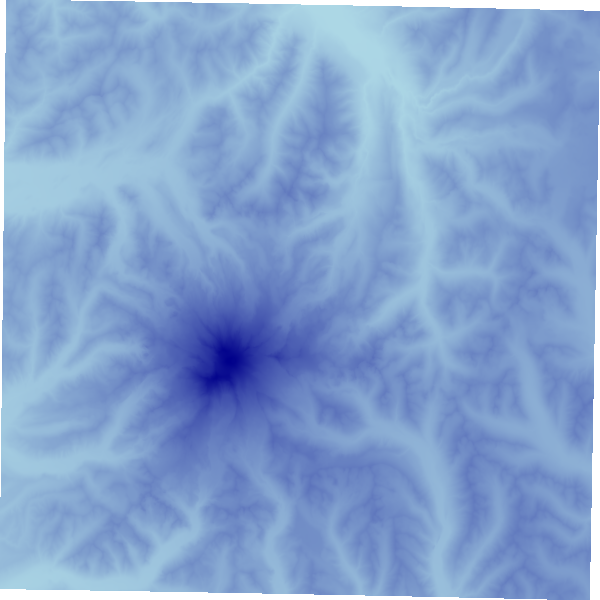
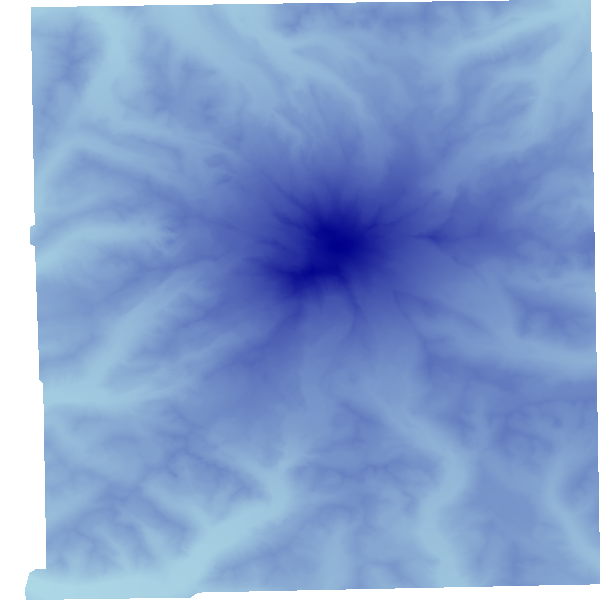

In [183]:
im = tf.Images(
    fast_imshow(xarr_01, 'linear', 'Rainier 10m DEM, 2001'),
    fast_imshow(xarr_07, 'linear', 'Rainier 1m DEM, 2007')
)
im

## Use warplib.memwarp_multi_fn on the two years

In [148]:
dem_files = [
    "rainier_lidar_datasets_dispersed/merged/dtm_2007.tif",
    "wa_state_lidar_datasets/merged/dtm.tif"
]
dataset_list = warplib.memwarp_multi_fn(dem_files, extent='union', res='min', verbose=False)
narray_list = [iolib.ds_getma(i) for i in dataset_list]

In [134]:
#This will return warped, in-memory GDAL dataset objects
#Can also resample all inputs to a lower resolution (res=256)
dem_files = [
    'rainier_lidar_datasets_dispersed/rainier_2007/dtm/rainier_2007_dtm_7.tif',
    'rainier_lidar_datasets_dispersed/rainier_2007/dtm/rainier_2007_dtm_8.tif',
    'rainier_lidar_datasets_dispersed/rainier_2007/dtm/rainier_2007_dtm_9.tif',
    'rainier_lidar_datasets_dispersed/rainier_2007/dtm/rainier_2007_dtm_12.tif',
    'rainier_lidar_datasets_dispersed/rainier_2007/dtm/rainier_2007_dtm_13.tif',
    'rainier_lidar_datasets_dispersed/rainier_2007/dtm/rainier_2007_dtm_14.tif',
]
dataset_list = warplib.memwarp_multi_fn(dem_files, extent='union', res='min', verbose=False)
narray_list = [iolib.ds_getma(i) for i in dataset_list]

In [149]:
narray_list[0].shape

(48122, 54369)

In [139]:
narray_list[1].shape

(15535, 21114)

In [138]:
narray_list[0].shape

(15535, 21114)

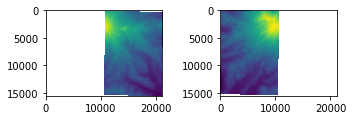

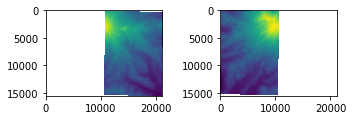

In [137]:
panelplot(narray_list)

In [74]:
ma = iolib.ds_getma(iolib.fn_getds('rainier_lidar_datasets_dispersed/rainier_2007/dtm/rainier_2007_dtm_12.tif'))
ma2 = iolib.ds_getma(iolib.fn_getds('rainier_lidar_datasets_dispersed/rainier_2007/dtm/rainier_2007_dtm_13.tif')) 

In [98]:
def panelplot(ls):
    n_plots = len(ls)
    fig, axes = plt.subplots(nrows=1, ncols=len(ls), figsize=(5, 3))
    for ax,data in zip(axes,ls):
        ax.imshow(data)
    fig.tight_layout()
    return fig

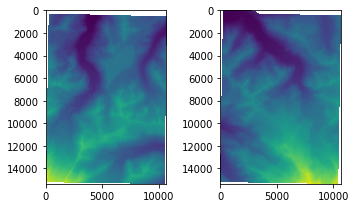

In [99]:
fig = panelplot([ma,ma2])

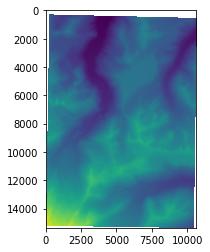

In [73]:
plt.imshow(ma)

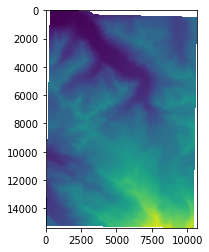

In [75]:
plt.imshow(ma2)